# Hypothesis Testing
<span style="font-size: 12px;">By: Marisol Hernandez</span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

## 1. Introduction to Hypothesis Testing
Hypothesis testing is a fundamental statistical method used to make inferences about population parameters based on sample data. It allows us to assess whether any observed differences or effects in data are statistically significant or simply due to chance.

### 1.1 Basic Framework
Hypothesis tests typically include four parts,

#### **1.1.1. Define the hypothesis**

- **Null Hypothesis** ($H_0$): The null hypothesis is a statement that there is no significant difference, effect, or relationship in the population.

- **Alternative Hypothesis** ($H_1$ or $H_a$): The alternative hypothesis is the statement we are testing. It suggests that there is a significant difference, effect, or relationship in the population.

As an example, suppose we have the following data for heights from a sample of 4 adults from Chicago, and 4 adults from Atlanta.


In [2]:
city1_heights = [183.0687026 , 186.70644354, 173.26657415, 179.03252868]


city2_heights = [167.5102584 , 177.81241131, 187.13298753, 175.29871173]

df = pd.DataFrame({'Chicago Heights': city1_heights,
                   'Atlanta Heights': city2_heights})

df

,Chicago Heights,Atlanta Heights
0,183.068703,167.510258
1,186.706444,177.812411
2,173.266574,187.132988
3,179.032529,175.298712


Lets start by looking at some basic statistics.

In [3]:
df.describe()

,Chicago Heights,Atlanta Heights
count,4.000000,4.000000
mean,180.518562,176.938592
std,5.761733,8.088509
min,173.266574,167.510258
25%,177.591040,173.351598
50%,181.050616,176.555562
75%,183.978138,180.142555
max,186.706444,187.132988


Which city has taller people? Well we can look at the means, but is this difference **significant**? 

It looks like Chicago has taller adults on average, but only by about 3cm. Is that enough to be sure? What if we just happened to sample shorter people when measuring Atlanta adults by accident?

In [4]:
df.mean()

Chicago Heights    180.518562
Atlanta Heights    176.938592
dtype: float64

It's hard to note if this difference in heights is due to random chance in our experiment, or if it is truly reflective of the heights of adults in these two cities. What we can do answer this is build a two-sample hypothesis test.

The first part of any significance test is to define our **null hypothesis**, $H_0$. This is typically a statement that there are no differences between two groups of data. We usually want to try to prove the null hypothesis wrong with our test.

$$H_0: \text{There is no difference in the mean height of adults from Chicago and Atlanta}$$
$$\mu_1 = \mu_2~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$

where:

- $\mu_1$ is the mean height of adults from Chicago

- $\mu_2$ is the mean height of adults from Atlanta

We also define our **alternative hypothesis**, $H_1$. This is usually the research question we wish to prove true, it contrasts to the null hypothesis.

$$H_1: \text{The mean height of adults from Chicago is greater than those from Atlanta}$$
$$\mu_1 > \mu_2~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$

#### **1.1.2. Set the significance level**

We will want to generate something called a p-value (more on this later) and compare it to a significance level, $\alpha$. The significance level is the threshold used to determine whether to reject the null hypothesis. It is common to use $\alpha = 0.05$ of $5\%$.

#### **1.1.3. Run a Hypothesis Test**
We will actually try to use the data to simulate what our experiment could look like if $H_0$ were true. We will do this simulation manually, but in practice you can use an already existing function or test.

We can create a statistic for our test as we are doing this significance test manually at the moment, this will be the difference in the means.

In [5]:
observed_mean_diff = df['Chicago Heights'].mean() - df['Atlanta Heights'].mean()
observed_mean_diff

3.579970000000003

We can plot our two samples.

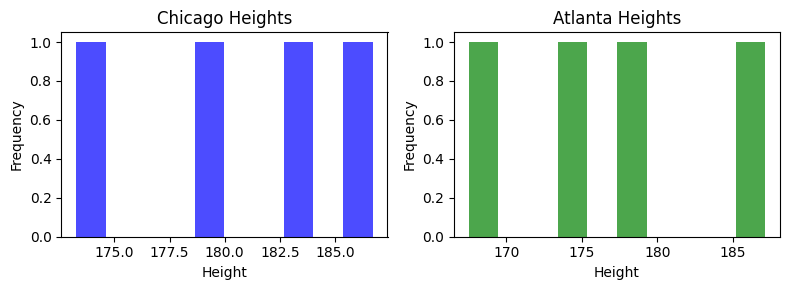

In [6]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

# Plot histogram for Chicago
axs[0].hist(city1_heights, bins=10, color='blue', alpha=0.7)
axs[0].set_title('Chicago Heights')
axs[0].set_xlabel('Height')
axs[0].set_ylabel('Frequency')

# Plot histogram for Atlanta
axs[1].hist(city2_heights, bins=10, color='green', alpha=0.7)
axs[1].set_title('Atlanta Heights')
axs[1].set_xlabel('Height')
axs[1].set_ylabel('Frequency')

# Show plot
plt.tight_layout()
plt.show()

Because we are manually building a statistical significance test, we will **simulate** the **null hypothesis**. Recall,

$$H_0: \text{There is no difference in the mean height of adults from Chicago and Atlanta}$$
$$\mu_1 = \mu_2~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$

where:

- $\mu_1$ is the mean height of adults from Chicago

- $\mu_2$ is the mean height of adults from Atlanta

If $H_0$ were true, then there is no difference between Chicago and Atlanta data, that means we could pool together the data and treat Chicago data and Atlanta data the same.

In [7]:
X1 = df['Chicago Heights']
X2 = df['Atlanta Heights']

data_assuming_null = np.concatenate([X1, X2])
data_assuming_null

array([183.0687026 , 186.70644354, 173.26657415, 179.03252868,
       167.5102584 , 177.81241131, 187.13298753, 175.29871173])

Now we can test if the difference in heights we saw earlier was due to random chance in selecting our adults, or if it may have been caused by a true difference in heights between the two cities.

By assuming $H_0$ to be true, we pool the data together. Then, we will re-sample 4 new "Chicagoans" from our pooled-together (null) sample. But these "Chicagoans" may be from either Chicago or Atlanta. Because we are assuming the null hypothesis is true, then there should be no difference in heights between a Chicagoan and an Atlantan.

We'll do the same for Atlanta, and re-sample 4 new "Atlantans" from our pooled-together (null) sample.

We'll then measure the difference in the means between the 4 new "Chicagoans" and 4 new "Atlantans"

In [8]:
def resample_data(X):
    simulated_X1 = np.random.choice(data_assuming_null, size=len(df))
    simulated_X2 = np.random.choice(data_assuming_null, size=len(df))
    return simulated_X1, simulated_X2

def test_statistic(x1, x2):
    return x1.mean() - x2.mean()

In [9]:
# We mix together Chicago and Atlanta data, and then randomly pull 4 people and label them as
# Chicagoans, and randomly pull 4 other people and label them as Atlantans
simulated_chicago_data, simulated_atlanta_data = resample_data(data_assuming_null)
print(f"Heights of simulated 'Chicagoans': {simulated_chicago_data}") # Our re-sampled list of "Chicagoans" 
print()
print(f"Heights of simulated 'Atlantans': {simulated_atlanta_data}") # Our re-sampled list of "Atlantans" 

Heights of simulated 'Chicagoans': [175.29871173 173.26657415 186.70644354 187.13298753]

Heights of simulated 'Atlantans': [173.26657415 187.13298753 187.13298753 187.13298753]


In [10]:
# Find the difference in means of the two new groups
simulated_mean_difference = test_statistic(simulated_chicago_data, simulated_atlanta_data)
simulated_mean_difference

-3.065204947500007

Compare this to our observed difference of means

In [11]:
observed_mean_diff

3.579970000000003

This allows us to re-perform our experiment, but under the assumption that there shouldn't be a difference between Chicagoans and Atlatans in their heights.

This let's us focus on the following question: "Assuming there is no difference in height between the cities, how would random chance in selecting four participants impact our measurements."

In [12]:
list_sim_mean_diff = []

n = 0

List of simulated mean differences: [0.7636955100000193]


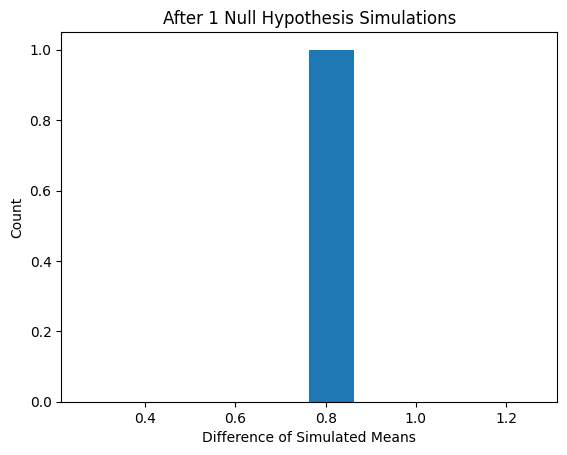

In [13]:
simulated_chicago_data, simulated_atlanta_data = resample_data(data_assuming_null)

simulated_mean_difference = test_statistic(simulated_chicago_data, simulated_atlanta_data)

list_sim_mean_diff.append(simulated_mean_difference)

print(f"List of simulated mean differences: {list_sim_mean_diff}")

n += 1

plt.hist(list_sim_mean_diff)
plt.title(f'After {n} Null Hypothesis Simulations')
plt.xlabel('Difference of Simulated Means')
plt.ylabel('Count')
plt.show()

Lets do even more simulations.

In [14]:
list_sim_mean_diff = []

n = 0

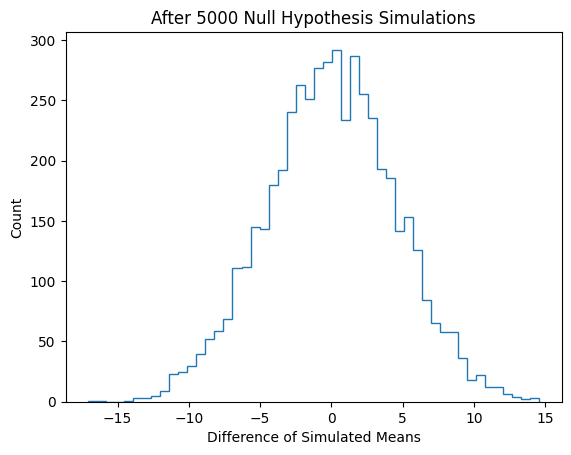

In [15]:
for _ in range(5000):
    
    simulated_chicago_data, simulated_atlanta_data = resample_data(data_assuming_null)

    simulated_mean_difference = test_statistic(simulated_chicago_data, simulated_atlanta_data)

    list_sim_mean_diff.append(simulated_mean_difference)
    
    n += 1
    
plt.hist(list_sim_mean_diff, bins=50, histtype='step')
plt.title(f'After {n} Null Hypothesis Simulations')
plt.xlabel('Difference of Simulated Means')
plt.ylabel('Count')
plt.show()

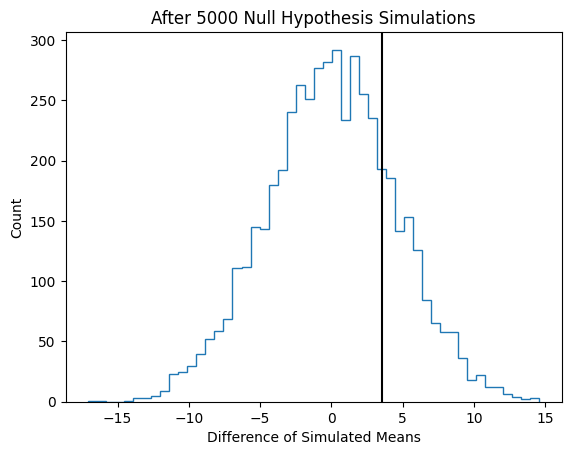

In [16]:
plt.hist(list_sim_mean_diff, bins=50, histtype='step')
plt.axvline(observed_mean_diff, c='k', label='Observed Diff. of Means')
plt.title(f'After {n} Null Hypothesis Simulations')
plt.xlabel('Difference of Simulated Means')
plt.ylabel('Count')
plt.show()

In [17]:
sim_mean_diff_less_obs = sum(list_sim_mean_diff > observed_mean_diff)

p_value = sim_mean_diff_less_obs/len(list_sim_mean_diff)

print(f"In our dataset, we observed a difference of the means of {observed_mean_diff:.4f}")
print()

print(f'Out of all {len(list_sim_mean_diff)} simulated null samples, {sim_mean_diff_less_obs} have mean differences greater than the true observed mean difference')
print()
print(f"That's a fraction of {p_value:4f} or {p_value*100:.3f}%")
print()
print(f"This is also our simulated p-value, {p_value:4f}")

In our dataset, we observed a difference of the means of 3.5800

Out of all 5000 simulated null samples, 1062 have mean differences greater than the true observed mean difference

That's a fraction of 0.212400 or 21.240%

This is also our simulated p-value, 0.212400


The **p-value** tell us, assuming our **null hypothesis** that both samples are actually the same were true, what the probability would be of getting the metric (difference in means) that we observed.

This is a bootstrap approaching to estimating the p-value. It is non-parametric, meaning it doesn't assume any distribution for the data. It is data-driven because we use the data to generate simulated samples. In the later section, we will introduce some common signficance tests.

#### **1.1.4. Make a Decision**
If the p-value is low, then that means the null hypothesis should rarely give us our observed metric. So we can reject the null hypothesis.

If the p-value is high, then that means the null hypothesis could often give us our observed metric. So we can't reject the null hypothesis, though it doesn't mean it is true - we just can't reject it.

In general,  we compare this p-value to a given significance level, $\alpha$, usually 0.05 (5%)

$$\text{If p-value } \lt \alpha \text{ we reject } H_0$$

$$\text{If p-value } \ge \alpha \text{ we can't reject } H_0$$

Given a $\alpha =$ 0.05 significance level, do we reject our null hypothesis, or state there is evidence for the null hypothesis being true?


In [18]:
p_value

0.2124

$$H_0: \text{There is no difference in the mean height of adults from Chicago and Atlanta}$$
$$\mu_1 = \mu_2~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$

## 2. Common Significance Tests
In practice, a signficance test is easier to implement than this. You don't have to do a non-parametric bootstrap, and in practice the above can have its limits.

<p align="center">
  <img src="imgs/common_tests.png" alt="Alt text" width="950" height="250">
</p>

## 3. One-Tailed vs Two-Tailed
In progress

In [21]:
# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(city1_heights, city2_heights, alternative='greater')

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 0.7209804085561639
p-value: 0.2490194186825515


$$ y = w_0 + w_1x_1 + w_2x_2 = w_0 + 0x_1 + w_2x_2 = w_0 + w_2x_2$$

$$H_0: w_1 = 0$$

$$H_a: w_1 \text{ != } 0$$

p_value = 0.3 and $\alpha = 0.05$

$$\text{If p-value } \lt \alpha \text{ we reject } H_0$$

$$\text{If p-value } \ge \alpha \text{ we can't reject } H_0$$

$$H_0: \mu_1 = \mu_2 = \mu_3 : \text{ The average BMI is the same for all three populations}$$

$$H_a: \mu_1 \text{ != } \mu_2 \text{ != } \mu_3 : \text{ The average BMI is not the same for all three populations}$$

- $\mu_1$ is the average BMI for population 1

- $\mu_2$ is the average BMI for population 2

- $\mu_3$ is the average BMI for population 3

$$H_0: \mu_1 > \mu_2$$

$$H_a: \mu_1 \le \mu_2$$